# Build a Binary Classification Model


:::{important} Required packages

You will need scikit-learn, xgboost, and plotnine to run the code in this notebook. You can install them using pip or conda:

**Using pip:**

```bash
pip install scikit-learn xgboost plotnine
```

**Using conda:**

```bash
conda install -c conda-forge scikit-learn py-xgboost plotnine
```

:::


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
)

import xgboost
from xgboost import XGBClassifier

Check XGBoost version.


In [10]:
print(f"xgboost version: {xgboost.__version__}")

xgboost version: 3.2.0


In [3]:
df = pd.read_csv(
    "http://raw.githubusercontent.com/bdi593/datasets/main/amazon-on-time-delivery-data/on-time-delivery-data.csv"
)
df

,zipcode,total_items,precipitation_rate,water_runoff,snow_depth,temperature,temperature_at_1500m,min_temperature,max_temperature,pressure,wind_gust_speed,total_cloud_cover,dew_point_temperature,relative_humidity,wind_speed,classification_ontime
0,2719,518.0,0.0,1.80,0.0,2.24,-5.41,-3.32,4.36,102949.50,9.09,80.5,-2.44,71.58,4.892280,Delayed
1,92545,969.0,0.0,0.40,0.0,12.17,6.87,4.76,19.41,94921.35,3.16,0.0,-6.60,28.81,2.376716,Delayed
2,27357,216.0,0.0,2.05,0.0,5.30,0.92,0.41,11.21,98834.30,8.92,92.5,0.63,73.53,3.213254,On time
3,81211,402.0,0.0,0.13,0.0,-0.28,10.12,-3.24,5.16,70768.17,6.00,16.0,-5.72,67.84,3.751669,Delayed
4,67220,246.0,0.0,0.04,0.0,11.71,7.29,5.90,17.24,96777.72,15.99,5.0,5.49,66.28,9.623910,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,11030,1228.0,0.0,0.00,0.0,5.64,2.97,3.52,6.85,101938.50,4.95,99.7,4.41,91.97,2.923090,Delayed
44996,63119,1627.0,0.0,6.10,0.0,8.46,2.25,3.33,14.21,100249.50,4.87,0.0,-1.65,51.47,2.134497,Delayed
44997,21032,496.0,0.0,2.14,0.0,3.53,-6.77,0.81,7.60,101679.00,7.78,5.7,-4.97,54.33,4.524221,Delayed
44998,95315,189.0,0.0,0.44,0.0,5.51,-2.32,-0.53,10.88,102243.50,2.73,15.7,-6.38,42.74,2.177973,On time


In [4]:
X = df.drop(columns=["classification_ontime"])
y = df["classification_ontime"]

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Delayed': np.int64(0), 'On time': np.int64(1)}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
)

xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [11]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8262222222222222
ROC-AUC: 0.9078464997188643

Confusion Matrix:
[[4361  867]
 [ 697 3075]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5228
           1       0.78      0.82      0.80      3772

    accuracy                           0.83      9000
   macro avg       0.82      0.82      0.82      9000
weighted avg       0.83      0.83      0.83      9000



In [ ]:
importances = xgb_model.feature_importances_
features = X.columns

df_feat_imp = pd.Series(importances, index=features).sort_values().reset_index()

df_feat_imp.columns = ["feature", "importance"]
df_feat_imp["importance_pct"] = df_feat_imp["importance"] * 100

df_feat_imp

,feature,importance,importance_pct
0,precipitation_rate,0.000000,0.000000
1,total_cloud_cover,0.018494,1.849440
2,relative_humidity,0.018739,1.873935
3,water_runoff,0.019717,1.971661
4,wind_speed,0.021448,2.144826
5,wind_gust_speed,0.021502,2.150244
6,temperature_at_1500m,0.024508,2.450827
7,pressure,0.028780,2.878010
8,min_temperature,0.030915,3.091481
9,zipcode,0.033227,3.322716


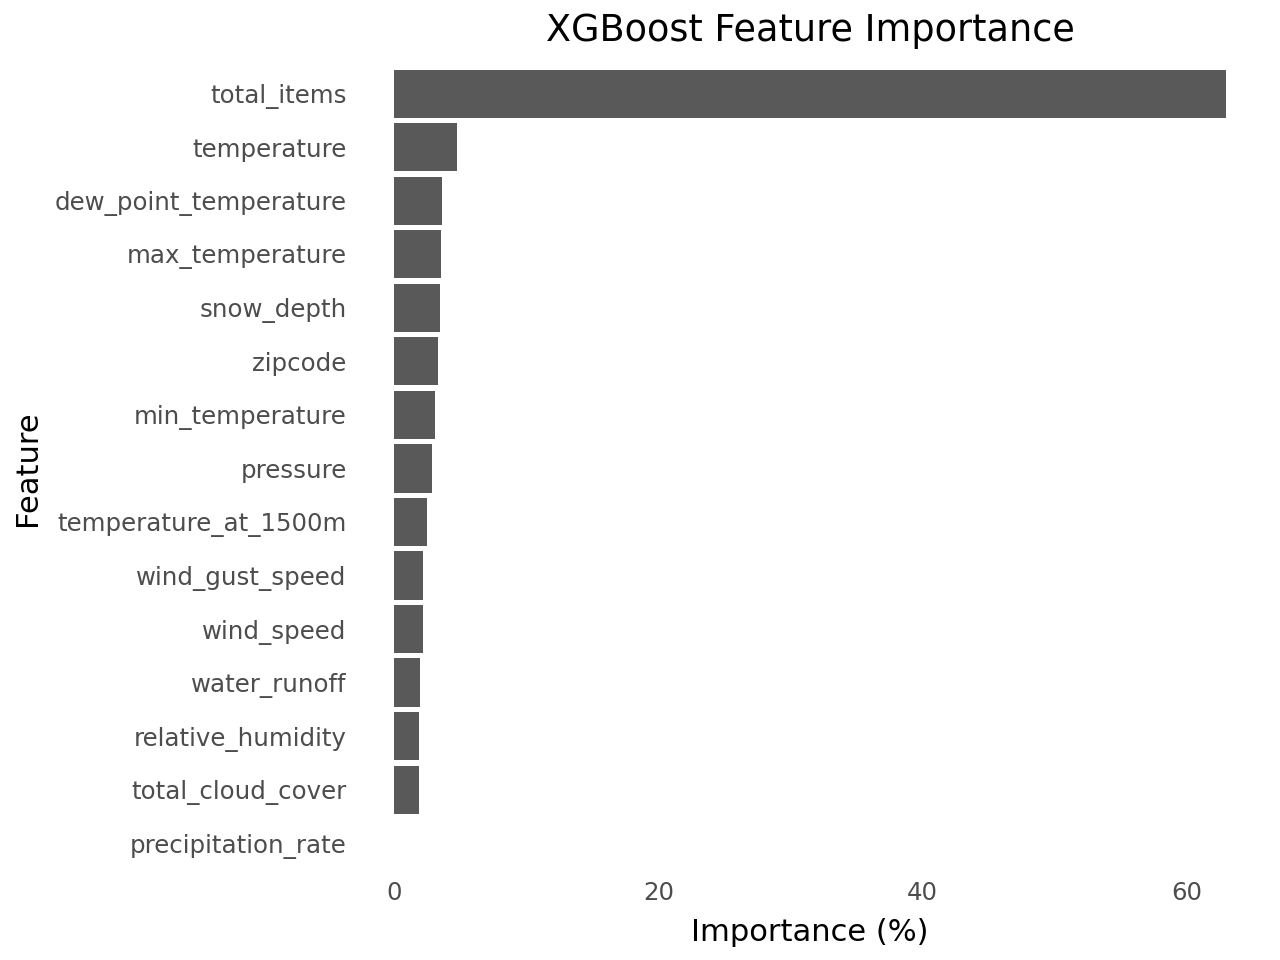

In [ ]:
from plotnine import (
    ggplot,
    aes,
    geom_col,
    coord_flip,
    labs,
    theme_minimal,
    theme,
    element_blank,
)

(
    ggplot(df_feat_imp, aes(x="reorder(feature, importance_pct)", y="importance_pct"))
    + geom_col()
    + coord_flip()
    + labs(title="XGBoost Feature Importance", x="Feature", y="Importance (%)")
    + theme_minimal()
    + theme(panel_grid_major=element_blank(), panel_grid_minor=element_blank())
)